In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import json

In [4]:
def plot_tau_synthetic(
        tau_file,
        algorithm,
        ns,
        rs,
):
    with open(tau_file) as f:
        tau = json.load(f)
    data = tau['synthetic'][algorithm]
    dict_list = []
    for n in ns:
        for r in rs:
            dic = {}
            dic["n"] = f"n={n}" 
            dic['r'] = f"{int(r*100)}%"
            key = f"{int(n*r)}/{n}"
            dic['value'] = data[key]
            dict_list.append(dic)
    df = pd.DataFrame(dict_list)

    with sns.axes_style("whitegrid"):  # Temporarily set style
        g = sns.catplot(
            data=df, kind="bar",
            x="n", y="value", hue="r",
            palette="bright", alpha=.8, 
            height=6, aspect=1.2
        )
        g.despine(left=True)
        
        # Set the overall title using suptitle
        g.fig.suptitle(
            f"Kendall's Tau values across different combinations ({algorithm})", 
            fontsize=20, 
            y=1.1)
        
        g.legend.set_bbox_to_anchor((1.15, 0.5))  # Adjust position as needed
        # Set the axis labels
        g.set_axis_labels("", "Kendall's Tau", fontsize=18)
        g.legend.set_title("Healthy Ratio", prop={'size': 16})
        # Adjust the font size for the legend text
        for text in g.legend.texts:
            text.set_fontsize(14)  # Adjust as needed
        
        # Increase font size for x-axis and y-axis tick labels
        g.set_xticklabels(fontsize=14)
        g.set_yticklabels(fontsize=14)
        
        g.savefig(f'img/{"synthetic"}/{algorithm}.png', dpi=200)

In [5]:
tau_file = 'tau.json'
ns = [50, 200, 500]
rs = [0.1, 0.25, 0.5]
chen_participant_size = [144, 500]
algorithms = ['conjugate_priors', 'soft_kmeans', 'hard_kmeans']
data_source = 'synthetic'
# for algorithm in algorithms:
#     plot_tau_synthetic(
#         tau_file,
#         algorithm,
#         ns,
#         rs
#     )

In [6]:
def plot_tau_chen_data(
        tau_file,
        chen_participant_size,
        algorithms,
):
    with open(tau_file) as f:
        tau = json.load(f)
    dict_list = []
    for algorithm in algorithms:
        data = tau['chen_data'][algorithm]
        for n in chen_participant_size:
            dic = {}
            dic["n"] = f"n={n}" 
            dic['algorithm'] = algorithm
            dic['tau'] = data[str(n)]
            dict_list.append(dic)
    df = pd.DataFrame(dict_list)

    with sns.axes_style("whitegrid"):  # Temporarily set style
        g = sns.catplot(
            data=df, kind="bar",
            x="n", y="tau", hue="algorithm",
            palette="bright", alpha=.8, 
            height=6, aspect=1.2
        )
        g.despine(left=True)
        
        # Set the overall title using suptitle
        g.fig.suptitle(
            f"Kendall's Tau values across different algorithms (Chen's data)", 
            fontsize=20, 
            y=1.1)
        
        g.legend.set_bbox_to_anchor((1.15, 0.5))  # Adjust position as needed
        # Set the axis labels
        g.set_axis_labels("", "Kendall's Tau", fontsize=18)
        g.legend.set_title("Algorithm", prop={'size': 16})
        # Adjust the font size for the legend text
        for text in g.legend.texts:
            text.set_fontsize(14)  # Adjust as needed
        
        # Increase font size for x-axis and y-axis tick labels
        g.set_xticklabels(fontsize=14)
        g.set_yticklabels(fontsize=14)

        g.savefig(f'img/{"chen_data"}/tau.png', dpi=200)


In [7]:
# plot_tau_chen_data(
#         'tau.json',
#         chen_participant_size,
# )

In [8]:
ln_ll_file = 'ln_likelihood.json'

In [20]:
def plot_ln_ll_synthetic(
                ln_ll_file,
                algorithm,
                ns,
                rs
                ):
        with open(ln_ll_file) as f:
                tau = json.load(f)
        data = tau['synthetic'][algorithm]
        dict_list = []
        for n in ns:
                for r in rs:
                        dic = {}
                        dic["n"] = f"n={n}" 
                        dic['r'] = f"{int(r*100)}%"
                        key = f"{int(n*r)}/{n}"
                        dic['ln_diff'] = data[key]['most_likely_ln_ll'] - data[key]['real_order_ln_ll']
                        dict_list.append(dic)
        df = pd.DataFrame(dict_list)
        with sns.axes_style("whitegrid"):  # Temporarily set style
                g = sns.catplot(
                        data=df, kind="bar",
                        x="n", y="ln_diff", hue="r",
                        palette="bright", alpha=.8, 
                        height=6, aspect=1.2
                )
                g.despine(left=True)
                
                # Set the overall title using suptitle
                g.fig.suptitle(
                        f"Comparing log likelihood difference across different combinations (conjugate priors)", 
                        fontsize=20, 
                        y=1.1)
                
                g.legend.set_bbox_to_anchor((1.4, 0.5))  # Adjust position as needed
                # Set the axis labels
                g.set_axis_labels("", "ln(most likely order) - ln(real order)", fontsize=18)
                g.legend.set_title("Healthy Ratio", prop={'size': 16})
                # Adjust the font size for the legend text
                for text in g.legend.texts:
                        text.set_fontsize(14)  # Adjust as needed
                
                # Increase font size for x-axis and y-axis tick labels
                g.set_xticklabels(fontsize=14)
                g.set_yticklabels(fontsize=14)
                # plt.yscale('log')
                
                g.savefig(f'img/{"synthetic"}/{algorithm}_ln_ll.png', dpi=200)

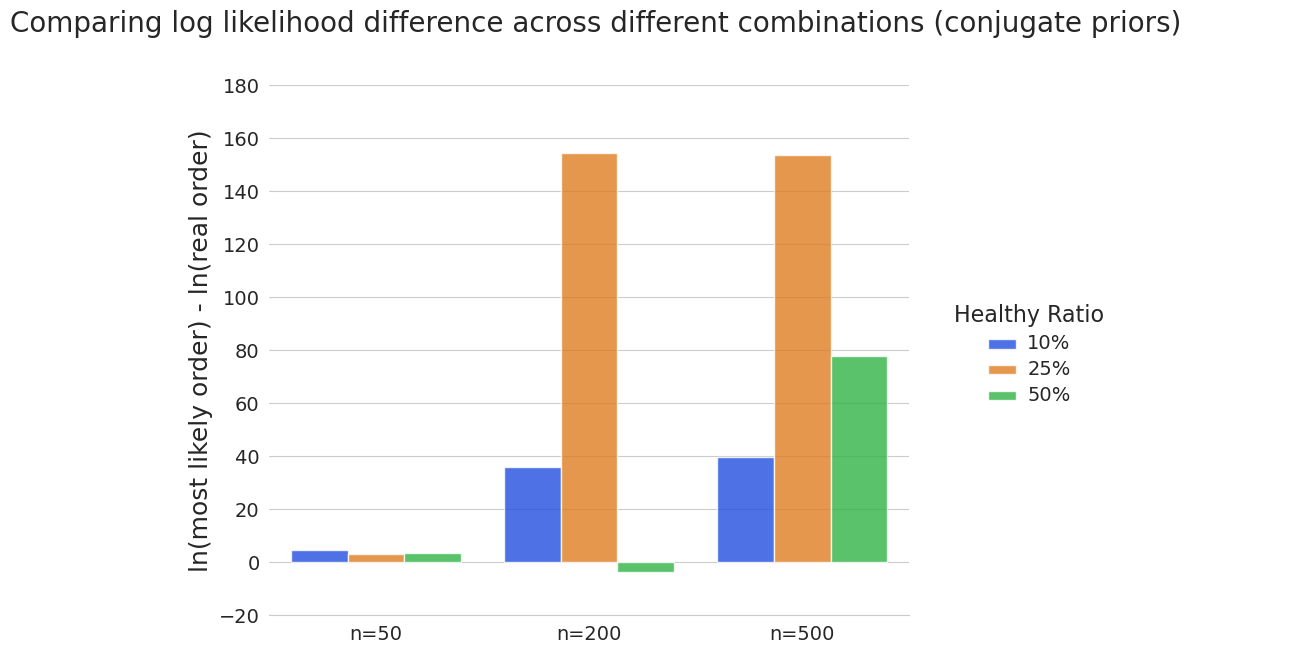

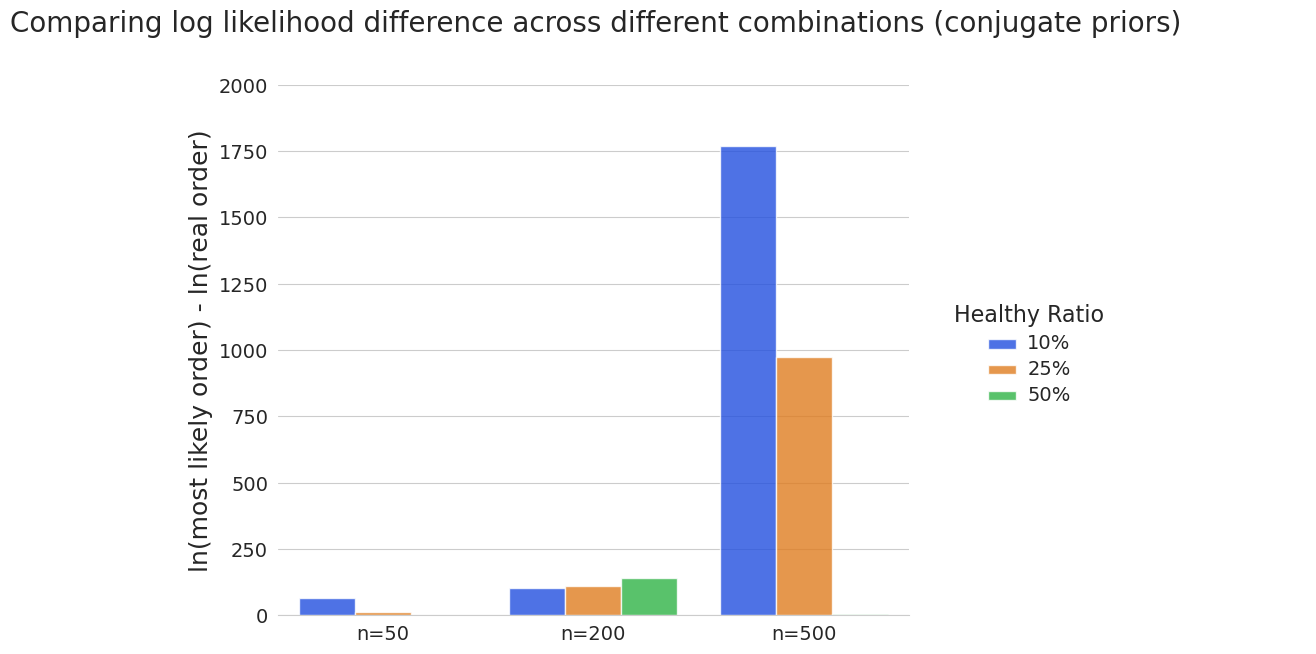

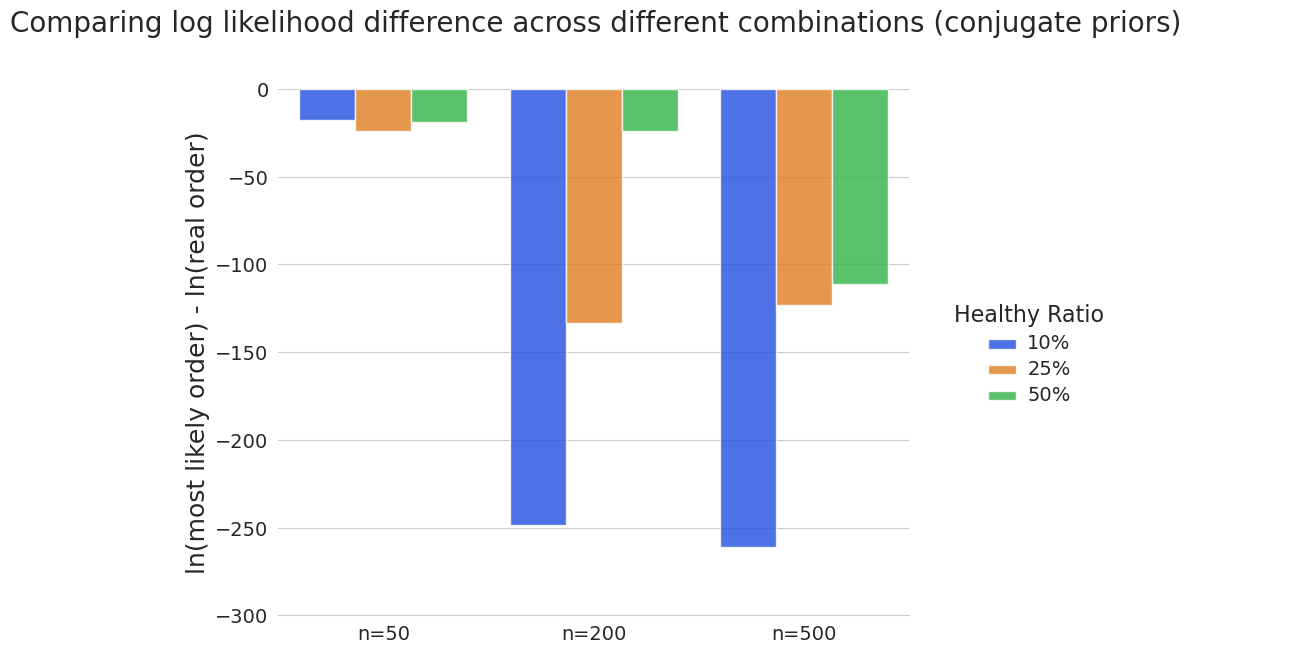

In [21]:
for algorithm in algorithms:
        plot_ln_ll_synthetic(
            ln_ll_file,
            algorithm,
            ns,
            rs
        )

In [22]:
def plot_ln_ll_chen_data(
        ln_ll_file,
        chen_participant_size,
        algorithms,
):
    with open(ln_ll_file) as f:
        tau = json.load(f)

    dict_list = []
    for algorithm in algorithms:
        data = tau['chen_data'][algorithm]
        for n in chen_participant_size:
            dic = {}
            dic["n"] = f"n={n}" 
            dic['algorithm'] = algorithm
            dic['ln_diff'] = data[str(n)]['most_likely_ln_ll'] - data[str(n)]['real_order_ln_ll']
            dict_list.append(dic)
    df = pd.DataFrame(dict_list)

    with sns.axes_style("whitegrid"):  # Temporarily set style
        g = sns.catplot(
            data=df, kind="bar",
            x="n", y="ln_diff", hue="algorithm",
            palette="bright", alpha=.8, 
            height=6, aspect=1.2
        )
        g.despine(left=True)
        
        # Set the overall title using suptitle
        g.fig.suptitle(
            f"Comparing log likelihood difference across different algorithms (Chen's data)", 
            fontsize=20, 
            y=1.1)
        
        g.legend.set_bbox_to_anchor((1.15, 0.5))  # Adjust position as needed
        # Set the axis labels
        g.set_axis_labels("", "ln(most likely order) - ln(real order)", fontsize=18)
        g.legend.set_title("Algorithm", prop={'size': 16})
        # Adjust the font size for the legend text
        for text in g.legend.texts:
            text.set_fontsize(14)  # Adjust as needed
        # plt.yscale('log')
        # Increase font size for x-axis and y-axis tick labels
        g.set_xticklabels(fontsize=14)
        g.set_yticklabels(fontsize=14)

        g.savefig(f'img/{"chen_data"}/ln_ll.png', dpi=200)

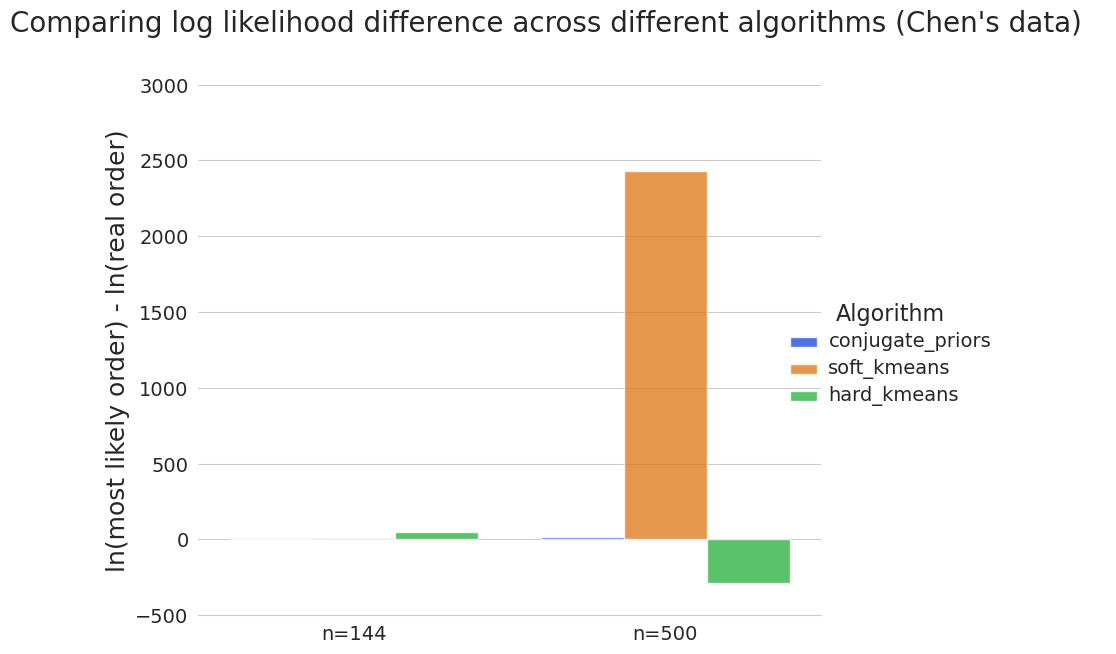

In [23]:
plot_ln_ll_chen_data(
        ln_ll_file,
        chen_participant_size,
        algorithms,
)